# Assignment 2

Implementare la funzione di sharpening per esaltare i dettagli di un'immagine in scala di grigi tramite unsharp mask. Verificare l'effetto di diversi parametri coinvolti nelle operazioni utilizzate.

In [1]:
# import librerie
import numpy as np
from skimage import io
from skimage import transform
from skimage import filters
from skimage import color 
from matplotlib import pyplot as plt
import ipywidgets as widgets

In [2]:
# Impostazione delle dimensioni di visualizzazione nel notebook
plt.rcParams['figure.figsize'] = [15,5] # width, height

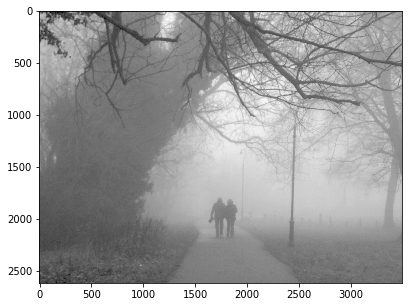

In [3]:
# importazione immagine utilizzata
fog = io.imread('images/fog.jpg', as_gray=True)
plt.imshow(fog, cmap = 'gray')

## Implementazione funzione di sharpening al variare di sigma

In [5]:
# definizione funzione di sharpening e dimostrazione interattiva con sigma da 0 a 100
def sharpening(sigma):
    gaus = filters.gaussian(fog, sigma = sigma)
    unsharp = fog - gaus
    sharp = fog + unsharp
    plt.imshow(sharp, cmap = 'gray')
    

sigma_slider = widgets.IntSlider(min=0, max=100, value = 20)
widgets.interact(sharpening, sigma=sigma_slider)

interactive(children=(IntSlider(value=20, description='sigma'), Output()), _dom_classes=('widget-interact',))

<function __main__.sharpening(sigma)>

È possibile notare come aumentando sigma i dettagli all'interno dell'immagine vengono esaltati maggiormente.

## Dimostrazione passaggi

1. Filtraggio gaussiano per sfocare l'immagine (eliminare i dettagli)

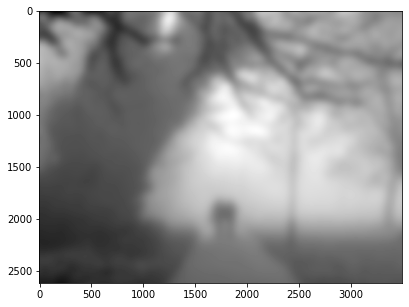

In [6]:
fog_gaus = filters.gaussian(fog, sigma = 40)
plt.imshow(fog_gaus, cmap = 'gray')

2. Differenza tra immagine originale ed immagine con filtro per isolare i dettagli

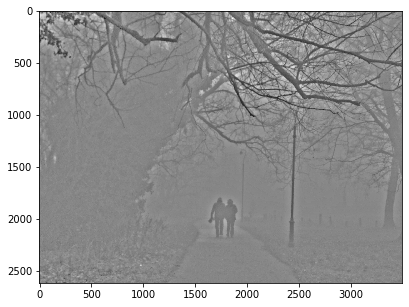

In [7]:
unsharp = fog - fog_gaus
plt.imshow(unsharp, cmap='gray')

3. Somma dei dettagli all'originale per esaltarli

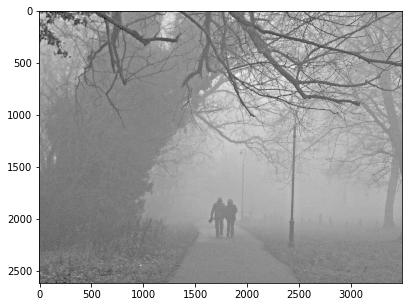

In [8]:
fog_p = fog + unsharp
plt.imshow(fog_p, cmap='gray')

Confronto tra immagine originale ed immagine con filtro di sharpening

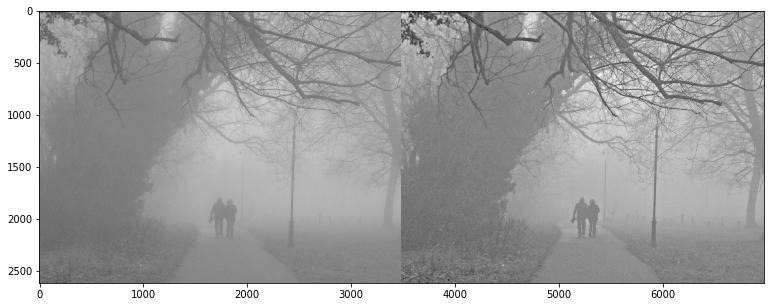

In [9]:
plt.imshow(np.concatenate((fog, fog_p), axis = 1), cmap = 'gray')

La differenza tra l'immagine originale (a sinistra) e l'immagine a cui è stato applicato il filtro di sharpening (a destra) è palese. Infatti sull'immagine modificata è possibile osservare un aumento dei dettagli.